In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os

In [4]:
os.chdir('/Users/angel/Desktop/proyectos/c_global/data')
os.getcwd()
print(os.listdir('.'))

['API_AG.LND.AGRI.K2_DS2_en_csv_v2_716226.csv', 'API_AG.LND.FRST.K2_DS2_en_csv_v2_716262.csv', 'API_EG.USE.ELEC.KH.PC_DS2_en_csv_v2_715482.csv', 'API_EN.ATM.CO2E.KT_DS2_en_csv_v2_713263.csv', 'API_SP.POP.TOTL_DS2_en_csv_v2_713131.csv', 'GlobalLandTemperaturesByCountry.csv']


In [10]:
df = pd.read_csv('GlobalLandTemperaturesByCountry.csv')
df

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland
...,...,...,...,...
577457,2013-05-01,19.059,1.022,Zimbabwe
577458,2013-06-01,17.613,0.473,Zimbabwe
577459,2013-07-01,17.000,0.453,Zimbabwe
577460,2013-08-01,19.759,0.717,Zimbabwe


In [11]:
df.shape

(577462, 4)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             577462 non-null  object 
 1   AverageTemperature             544811 non-null  float64
 2   AverageTemperatureUncertainty  545550 non-null  float64
 3   Country                        577462 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.6+ MB


In [9]:
df.describe()

,AverageTemperature,AverageTemperatureUncertainty
count,544811.000000,545550.000000
mean,17.193354,1.019057
std,10.953966,1.201930
min,-37.658000,0.052000
25%,10.025000,0.323000
50%,20.901000,0.571000
75%,25.814000,1.206000
max,38.842000,15.003000


In [12]:
df['Country'].unique()

array(['Åland', 'Afghanistan', 'Africa', 'Albania', 'Algeria',
       'American Samoa', 'Andorra', 'Angola', 'Anguilla', 'Antarctica',
       'Antigua And Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Asia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Baker Island', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bhutan', 'Bolivia',
       'Bonaire, Saint Eustatius And Saba', 'Bosnia And Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Bulgaria',
       'Burkina Faso', 'Burma', 'Burundi', "Côte D'Ivoire", 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'Christmas Island', 'Colombia', 'Comoros',
       'Congo (Democratic Republic Of The)', 'Congo', 'Costa Rica',
       'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czech Republic',
       'Denmark (Europe)', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecu

In [14]:
df['year']= pd.to_datetime(df['dt'])
df['year']

0        1743-11-01
1        1743-12-01
2        1744-01-01
3        1744-02-01
4        1744-03-01
            ...    
577457   2013-05-01
577458   2013-06-01
577459   2013-07-01
577460   2013-08-01
577461   2013-09-01
Name: year, Length: 577462, dtype: datetime64[ns]

In [15]:
idx = df['year'] > '1970-01-01'

In [17]:
df = df[idx]
df

C:\Users\angel\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,dt,AverageTemperature,AverageTemperatureUncertainty,Country,year
2715,1970-02-01,-10.835,0.478,Åland,1970-02-01
2716,1970-03-01,-1.583,0.608,Åland,1970-03-01
2717,1970-04-01,0.493,0.463,Åland,1970-04-01
2718,1970-05-01,6.939,0.565,Åland,1970-05-01
2719,1970-06-01,14.252,0.676,Åland,1970-06-01
...,...,...,...,...,...
577457,2013-05-01,19.059,1.022,Zimbabwe,2013-05-01
577458,2013-06-01,17.613,0.473,Zimbabwe,2013-06-01
577459,2013-07-01,17.000,0.453,Zimbabwe,2013-07-01
577460,2013-08-01,19.759,0.717,Zimbabwe,2013-08-01


In [19]:
df_temp_avg = df.groupby(['Country',
                pd.Grouper(key='year', freq='1Y')
               ]).agg({'AverageTemperature':[np.mean,np.median]})
df_temp_avg

AverageTemperature         
                                     mean   median
Country     year                                  
Afghanistan 1970-12-31          16.005455  16.1990
            1971-12-31          14.823500  14.9340
            1972-12-31          12.547167  13.8725
            1973-12-31          14.235500  14.9130
            1974-12-31          13.316750  13.6160
...                                   ...      ...
Åland       2009-12-31           6.489083   5.5765
            2010-12-31           4.861917   4.7550
            2011-12-31           7.170750   7.4990
            2012-12-31           6.063917   6.2540
            2013-12-31           6.229750   6.0140

[10692 rows x 2 columns]

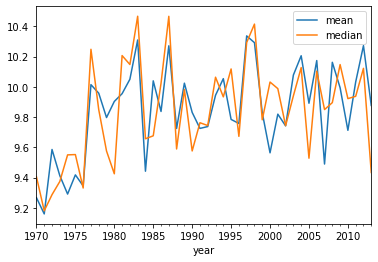

In [20]:
df_temp_avg.xs('Chile')['AverageTemperature'].plot()

In [22]:
df_temp_med = df_temp_avg['AverageTemperature'][['median']].reset_index()
df_temp_med

,Country,year,median
0,Afghanistan,1970-12-31,16.1990
1,Afghanistan,1971-12-31,14.9340
2,Afghanistan,1972-12-31,13.8725
3,Afghanistan,1973-12-31,14.9130
4,Afghanistan,1974-12-31,13.6160
...,...,...,...
10687,Åland,2009-12-31,5.5765
10688,Åland,2010-12-31,4.7550
10689,Åland,2011-12-31,7.4990
10690,Åland,2012-12-31,6.2540


In [24]:
df_temp_med['date'] = df_temp_med['year'].dt.year
df_temp_med['date']

0        1970
1        1971
2        1972
3        1973
4        1974
         ... 
10687    2009
10688    2010
10689    2011
10690    2012
10691    2013
Name: date, Length: 10692, dtype: int64

In [28]:
df_temp_med.rename(columns={'median':'temperature'},inplace=True)
df_temp_med

,Country,year,temperature,date
0,Afghanistan,1970-12-31,16.1990,1970
1,Afghanistan,1971-12-31,14.9340,1971
2,Afghanistan,1972-12-31,13.8725,1972
3,Afghanistan,1973-12-31,14.9130,1973
4,Afghanistan,1974-12-31,13.6160,1974
...,...,...,...,...
10687,Åland,2009-12-31,5.5765,2009
10688,Åland,2010-12-31,4.7550,2010
10689,Åland,2011-12-31,7.4990,2011
10690,Åland,2012-12-31,6.2540,2012


In [29]:
df_temp_pivot = df_temp_med.pivot_table(values='temperature',index='date',columns='Country')
df_temp_pivot

Country,Afghanistan,Africa,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua And Barbuda,Argentina,...,Uruguay,Uzbekistan,Venezuela,Vietnam,Virgin Islands,Western Sahara,Yemen,Zambia,Zimbabwe,Åland
date,,,,,,,,,,,,,,,,,,,,,
1970,16.1990,25.2360,12.4230,23.2840,26.7180,11.6390,22.9640,27.1510,27.2240,15.1150,...,15.7640,15.5410,25.2780,24.6330,26.7220,23.8210,27.4390,22.1330,23.2560,6.9340
1971,14.9340,24.7755,11.6735,22.7810,26.4845,11.9275,22.4615,26.5295,26.3810,14.7665,...,16.5470,12.9860,24.6480,24.1105,26.2470,20.2715,26.5130,21.8265,22.7055,4.4870
1972,13.8725,25.1230,11.2175,22.4985,26.8205,10.0250,22.6070,26.9150,26.7700,14.3445,...,16.9190,13.5640,25.2615,24.5165,26.6150,21.3905,26.8175,21.9800,22.3980,5.6200
1973,14.9130,25.3445,11.8370,22.9975,27.0120,9.5525,23.0730,27.3360,27.1725,14.8675,...,17.5420,13.4735,25.2020,25.0080,27.0685,22.9215,27.2265,22.1090,22.5815,3.5795
1974,13.6160,24.8260,11.3210,21.5795,26.6350,8.2045,22.3275,26.6015,26.5190,15.2160,...,17.4025,13.2105,25.0760,24.3700,26.1720,21.5755,26.6320,21.6005,21.3255,5.4550
1975,13.5130,24.8045,12.3595,23.0740,26.6510,10.4105,22.4210,26.4780,26.3340,15.1515,...,17.1810,13.3395,24.9790,24.9900,26.2985,20.5175,26.1155,21.8635,21.7910,6.0170
1976,14.1615,24.8225,12.6080,22.2980,26.6155,9.6625,22.1455,26.9825,26.8425,14.3965,...,16.5660,11.3820,25.0590,24.4665,26.6620,20.4625,26.3220,21.6980,21.9880,4.3855
1977,15.6575,25.0345,11.9870,23.5375,26.7085,10.4055,22.6000,27.2010,27.0085,15.9725,...,18.3455,13.8000,25.6165,24.6295,26.8935,22.6755,26.8845,22.1670,22.2910,5.4745
1978,15.2580,24.9135,11.5490,22.5620,26.7250,9.7565,22.7055,27.2320,27.0370,15.3350,...,17.1655,13.2965,25.5600,24.4290,26.9675,21.7730,27.0135,22.1010,22.6210,5.7475


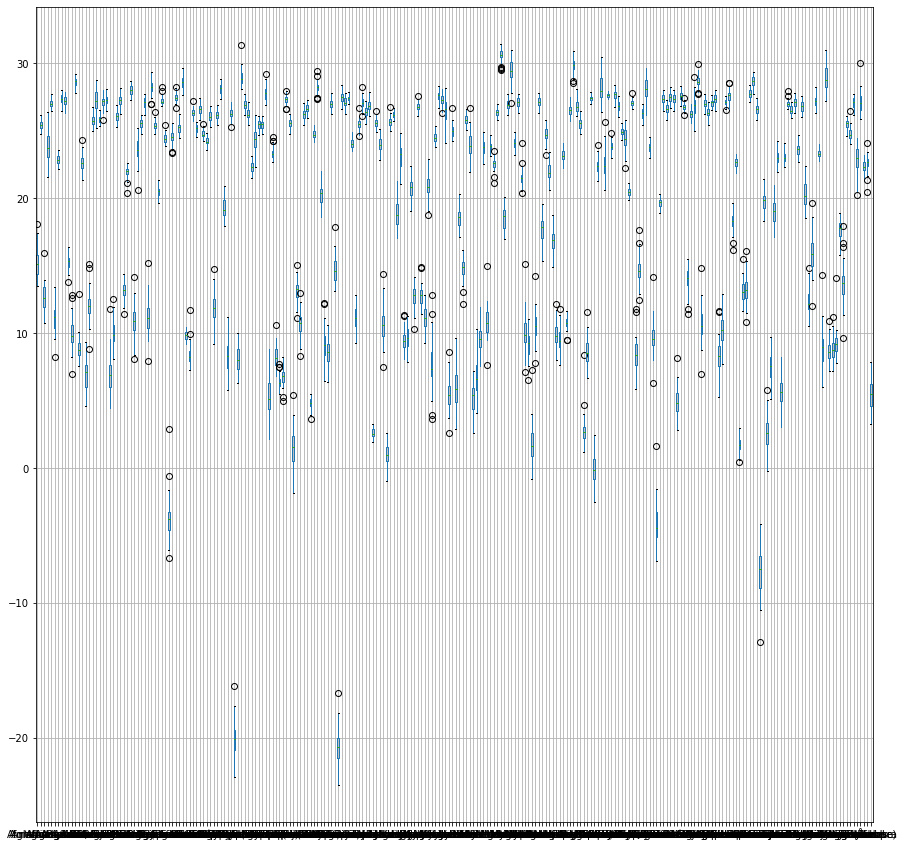

In [31]:
df_temp_pivot.boxplot(figsize=(15,15))

In [32]:
 df_temp_pivot.T

date,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,16.199,14.9340,13.8725,14.9130,13.6160,13.5130,14.1615,15.6575,15.2580,16.2990,...,14.6700,15.5190,16.6300,15.4785,16.3810,13.8930,17.4285,16.0240,15.6755,18.1000
Africa,25.236,24.7755,25.1230,25.3445,24.8260,24.8045,24.8225,25.0345,24.9135,25.3705,...,25.7840,26.0680,25.9285,25.6990,25.6660,25.8935,26.1595,25.6220,25.5670,25.7865
Albania,12.423,11.6735,11.2175,11.8370,11.3210,12.3595,12.6080,11.9870,11.5490,11.7765,...,13.6610,12.4485,13.6685,13.1770,13.2985,13.1795,12.6825,12.4440,13.9060,15.9465
Algeria,23.284,22.7810,22.4985,22.9975,21.5795,23.0740,22.2980,23.5375,22.5620,23.1455,...,24.8325,25.3350,25.7525,24.3050,24.4435,23.7635,25.4575,24.1415,24.5915,26.3620
American Samoa,26.718,26.4845,26.8205,27.0120,26.6350,26.6510,26.6155,26.7085,26.7250,26.8385,...,27.3035,27.4560,26.9235,27.4810,27.0560,26.9025,27.3260,27.0205,27.1620,27.6665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Western Sahara,23.821,20.2715,21.3905,22.9215,21.5755,20.5175,20.4625,22.6755,21.7730,22.7670,...,23.1790,24.0055,23.7470,23.0445,24.2500,23.0090,24.2365,24.2690,23.6175,24.2745
Yemen,27.439,26.5130,26.8175,27.2265,26.6320,26.1155,26.3220,26.8845,27.0135,27.0245,...,27.6495,27.4135,27.4390,27.6570,27.4595,27.5515,28.2950,27.8980,27.8575,30.0215
Zambia,22.133,21.8265,21.9800,22.1090,21.6005,21.8635,21.6980,22.1670,22.1010,22.2165,...,22.4920,22.9420,22.2425,22.2380,21.5855,22.1360,22.6880,22.0270,22.4530,21.2985


In [33]:
df_temp_pivot.T.sample(5)

date,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Tunisia,20.174,19.6470,18.6385,19.6385,18.5315,19.1290,19.2235,19.9580,18.6720,19.3595,...,20.5785,21.1685,22.3865,20.6920,21.4475,19.8120,21.0155,20.7080,22.1020,22.3255
Chile,9.405,9.1805,9.2875,9.3745,9.5505,9.5525,9.3315,10.2485,9.8495,9.5760,...,10.1275,9.5285,10.1040,9.8500,9.8960,10.1475,9.9225,9.9375,10.1225,9.4340
Ethiopia,23.297,22.7175,23.3955,23.2660,22.8005,22.7865,23.0850,23.3410,23.0820,23.2720,...,23.6135,23.6715,23.4975,23.4075,23.5075,24.2115,23.7550,24.2310,24.1690,24.5320
"Bonaire, Saint Eustatius And Saba",28.301,27.2900,27.8050,27.7220,27.3970,27.4675,27.6690,28.0855,28.0820,28.2010,...,27.6760,28.3980,28.7105,28.3555,27.9705,28.5240,28.5635,28.0250,28.3755,27.8670
South America,22.669,21.9110,22.3110,22.4800,21.8890,22.1260,21.9095,22.5340,22.3675,22.3415,...,23.0725,22.7925,22.8745,23.0490,22.7555,23.0605,22.8585,22.7890,23.3000,22.0220


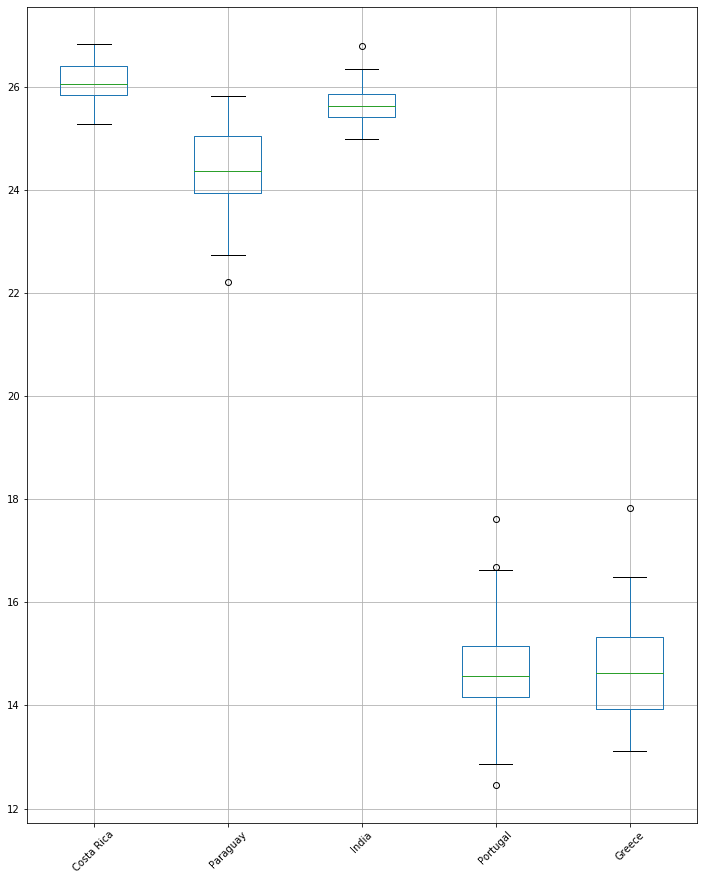

In [36]:
df_temp_pivot.T.sample(5).T.boxplot(figsize=(12,15), rot=45)

In [37]:
df_agri = pd.read_csv('API_AG.LND.AGRI.K2_DS2_en_csv_v2_716226.csv', header = 2)
df_fore = pd.read_csv('API_AG.LND.FRST.K2_DS2_en_csv_v2_716262.csv', header = 2)
df_elec = pd.read_csv('API_EG.USE.ELEC.KH.PC_DS2_en_csv_v2_715482.csv', header = 2)
df_co2e = pd.read_csv('API_EN.ATM.CO2E.KT_DS2_en_csv_v2_713263.csv', header = 2)
df_popu = pd.read_csv('API_SP.POP.TOTL_DS2_en_csv_v2_713131.csv', header = 2)

In [39]:
df_popu.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
count,2.600000e+02,2.600000e+02,2.600000e+02,2.600000e+02,2.600000e+02,2.600000e+02,2.600000e+02,2.600000e+02,2.600000e+02,2.600000e+02,...,2.630000e+02,2.620000e+02,2.620000e+02,2.620000e+02,2.620000e+02,2.620000e+02,2.620000e+02,2.620000e+02,0.0,0.0
mean,1.180664e+08,1.196487e+08,1.217640e+08,1.243969e+08,1.270502e+08,1.297689e+08,1.326321e+08,1.354859e+08,1.383920e+08,1.414415e+08,...,2.806647e+08,2.852876e+08,2.889023e+08,2.925508e+08,2.962148e+08,2.999114e+08,3.035995e+08,3.072302e+08,NaN,NaN
std,3.730942e+08,3.775621e+08,3.841278e+08,3.926847e+08,4.012844e+08,4.101198e+08,4.195221e+08,4.288621e+08,4.384146e+08,4.484547e+08,...,8.924886e+08,9.047110e+08,9.155191e+08,9.264022e+08,9.373108e+08,9.483019e+08,9.592829e+08,9.700134e+08,NaN,NaN
min,3.893000e+03,3.989000e+03,4.076000e+03,4.183000e+03,4.308000e+03,4.468000e+03,4.685000e+03,4.920000e+03,5.193000e+03,5.459000e+03,...,1.005700e+04,1.027900e+04,1.082100e+04,1.097200e+04,1.109900e+04,1.122500e+04,1.137000e+04,1.150800e+04,NaN,NaN
25%,5.022908e+05,5.109635e+05,5.206552e+05,5.311588e+05,5.421285e+05,5.533358e+05,5.647510e+05,5.823600e+05,5.981080e+05,6.100040e+05,...,1.449584e+06,1.409858e+06,1.427339e+06,1.444866e+06,1.463189e+06,1.514952e+06,1.577592e+06,1.638404e+06,NaN,NaN
50%,3.658470e+06,3.738358e+06,3.821016e+06,3.926268e+06,4.051891e+06,4.180652e+06,4.275565e+06,4.344568e+06,4.415026e+06,4.455048e+06,...,9.460830e+06,9.624311e+06,9.746730e+06,9.855382e+06,1.000153e+07,1.012427e+07,1.017900e+07,1.023247e+07,NaN,NaN
75%,2.532671e+07,2.611452e+07,2.690411e+07,2.766416e+07,2.839934e+07,2.913676e+07,2.988608e+07,3.059503e+07,3.120239e+07,3.179527e+07,...,5.149739e+07,5.247893e+07,5.323004e+07,5.397970e+07,5.470996e+07,5.541544e+07,5.641631e+07,5.741430e+07,NaN,NaN
max,3.032020e+09,3.073078e+09,3.126066e+09,3.191186e+09,3.256700e+09,3.323624e+09,3.393699e+09,3.463147e+09,3.533537e+09,3.608236e+09,...,7.004011e+09,7.086994e+09,7.170962e+09,7.255654e+09,7.340548e+09,7.426103e+09,7.510990e+09,7.594270e+09,NaN,NaN


In [40]:
range(1971,2015)
map(str,range(1971,2015))
list(map(str,range(1971,2015)))

['1971',
 '1972',
 '1973',
 '1974',
 '1975',
 '1976',
 '1977',
 '1978',
 '1979',
 '1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014']

In [41]:
cols = ['Country Name','Country Code'] + list(map(str,range(1971,2015)))
cols[:5]

['Country Name', 'Country Code', '1971', '1972', '1973']

In [42]:
df_agri.loc[:,cols].melt(id_vars=['Country Name','Country Code']).rename(
    columns={'variable':'date',
             'Country Name':'Country',
             'Country Code':'name',
             'value':'agriculture'})

,Country,name,date,agriculture
0,Aruba,ABW,1971,20.0
1,Afghanistan,AFG,1971,380360.0
2,Angola,AGO,1971,574000.0
3,Albania,ALB,1971,12000.0
4,Andorra,AND,1971,250.0
...,...,...,...,...
11611,Kosovo,XKX,2014,NaN
11612,"Yemen, Rep.",YEM,2014,235460.0
11613,South Africa,ZAF,2014,968410.0
11614,Zambia,ZMB,2014,238360.0


In [43]:
def fun_format(df,col='agriculture'):
  return df.loc[:,cols].melt(id_vars=['Country Name','Country Code']).rename(
    columns={'variable':'date',
             'Country Name':'Country',
             'Country Code':'name',
             'value':col})

In [44]:
df_agri = fun_format(df_agri,col='agriculture')
df_fore = fun_format(df_fore,col='forestal')
df_elec = fun_format(df_elec,col='electricprod')
df_co2e = fun_format(df_co2e,col='co2')
df_popu = fun_format(df_popu,col='population')
df_popu

,Country,name,date,population
0,Aruba,ABW,1971,59440.0
1,Afghanistan,AFG,1971,11475445.0
2,Angola,AGO,1971,6040777.0
3,Albania,ALB,1971,2187853.0
4,Andorra,AND,1971,25559.0
...,...,...,...,...
11611,Kosovo,XKX,2014,1821800.0
11612,"Yemen, Rep.",YEM,2014,25823485.0
11613,South Africa,ZAF,2014,54545991.0
11614,Zambia,ZMB,2014,15399753.0


In [46]:
df_temp_med

,Country,year,temperature,date
0,Afghanistan,1970-12-31,16.1990,1970
1,Afghanistan,1971-12-31,14.9340,1971
2,Afghanistan,1972-12-31,13.8725,1972
3,Afghanistan,1973-12-31,14.9130,1973
4,Afghanistan,1974-12-31,13.6160,1974
...,...,...,...,...
10687,Åland,2009-12-31,5.5765,2009
10688,Åland,2010-12-31,4.7550,2010
10689,Åland,2011-12-31,7.4990,2011
10690,Åland,2012-12-31,6.2540,2012


In [47]:
df_popu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11616 entries, 0 to 11615
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Country     11616 non-null  object 
 1   name        11616 non-null  object 
 2   date        11616 non-null  object 
 3   population  11501 non-null  float64
dtypes: float64(1), object(3)
memory usage: 363.1+ KB


In [50]:
df_temp_med.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Country      10692 non-null  object        
 1   year         10692 non-null  datetime64[ns]
 2   temperature  10648 non-null  float64       
 3   date         10692 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 334.2+ KB


In [51]:
df_popu['date'] = df_popu['date'].astype(float)
df_fore['date'] = df_fore['date'].astype(float)
df_elec['date'] = df_elec['date'].astype(float)
df_co2e['date'] = df_co2e['date'].astype(float)
df_agri['date'] = df_agri['date'].astype(float)

In [53]:
df_merge = pd.merge(df_temp_med[['Country','temperature','date']],
                    df_popu, on = ['Country', 'date'],how = 'inner')

In [54]:
df_merge = pd.merge(df_merge,
                    df_fore,
                    on = ['Country','name', 'date'],
                    how = 'inner')

df_merge = pd.merge(df_merge,
                    df_elec,
                    on = ['Country','name', 'date'],
                    how = 'inner')

df_merge = pd.merge(df_merge,
                    df_co2e,
                    on = ['Country','name', 'date'],
                    how = 'inner')

df_merge = pd.merge(df_merge,
                    df_agri,
                    on = ['Country','name', 'date'],
                    how = 'inner')

df_merge

,Country,temperature,date,name,population,forestal,electricprod,co2,agriculture
0,Afghanistan,14.9340,1971,AFG,11475445.0,NaN,NaN,1895.839,380360.0
1,Afghanistan,13.8725,1972,AFG,11791215.0,NaN,NaN,1532.806,380460.0
2,Afghanistan,14.9130,1973,AFG,12108963.0,NaN,NaN,1639.149,380480.0
3,Afghanistan,13.6160,1974,AFG,12412950.0,NaN,NaN,1917.841,380480.0
4,Afghanistan,13.5130,1975,AFG,12689160.0,NaN,NaN,2126.860,380480.0
...,...,...,...,...,...,...,...,...,...
7219,Zimbabwe,22.4860,2009,ZWE,12526968.0,159510.000000,585.456912,5603.176,163000.0
7220,Zimbabwe,23.3040,2010,ZWE,12697723.0,156240.000000,606.644199,7777.707,162000.0
7221,Zimbabwe,22.9420,2011,ZWE,12894316.0,153115.996094,636.249337,9563.536,164000.0
7222,Zimbabwe,23.0455,2012,ZWE,13115131.0,149992.001953,608.762505,7792.375,162000.0


In [55]:
df_climate = df_merge.dropna()

In [57]:
pd.set_option('display.float_format','{:,.1f}'.format)

In [58]:
df_climate.groupby('Country')['co2'].median().sort_values(ascending=False)

Country
North America   5,886,299.6
United States   5,382,123.7
China           3,668,917.8
Japan           1,202,082.9
India           1,047,705.9
                    ...    
Haiti               1,652.0
Mozambique          1,584.1
Togo                1,285.3
Niger                 784.7
Eritrea               614.2
Name: co2, Length: 120, dtype: float64

In [62]:
first_10_total = df_climate.groupby('Country')['co2'].median().sort_values(ascending=False).head(10)
first_10_total


Country
North America    5,886,299.6
United States    5,382,123.7
China            3,668,917.8
Japan            1,202,082.9
India            1,047,705.9
Germany            822,812.5
United Kingdom     538,678.6
Canada             518,396.5
Italy              430,485.6
Mexico             413,683.4
Name: co2, dtype: float64

In [63]:
first_10_index = df_climate.groupby('Country')['co2'].median().sort_values(ascending=False).head(10).index
first_10_index

Index(['North America', 'United States', 'China', 'Japan', 'India', 'Germany',
       'United Kingdom', 'Canada', 'Italy', 'Mexico'],
      dtype='object', name='Country')

In [65]:
df_max_co2=df_climate[df_climate['Country'].isin(first_10_index)]
df_max_co2

,Country,temperature,date,name,population,forestal,electricprod,co2,agriculture
1266,Canada,-4.6,1990,CAN,"27,691,138.0","3,482,730.0","16,167.4","435,181.2","677,680.0"
1267,Canada,-4.2,1991,CAN,"28,037,420.0","3,482,259.1","16,181.6","426,780.1","677,530.0"
1268,Canada,-5.0,1992,CAN,"28,371,264.0","3,481,788.1","16,164.4","440,978.8","678,140.0"
1269,Canada,-4.0,1993,CAN,"28,684,764.0","3,481,316.9","16,320.1","445,580.8","678,740.0"
1270,Canada,-3.4,1994,CAN,"29,000,663.0","3,480,845.9","16,388.3","456,849.5","679,340.0"
...,...,...,...,...,...,...,...,...,...
7004,United States,8.4,2009,USA,"306,771,529.0","3,079,274.1","12,913.7","5,263,505.5","4,099,606.9"
7005,United States,10.2,2010,USA,"309,326,085.0","3,087,200.0","13,394.9","5,395,532.1","4,084,261.9"
7006,United States,9.5,2011,USA,"311,580,009.0","3,089,950.0","13,246.0","5,289,680.5","4,046,693.1"
7007,United States,9.9,2012,USA,"313,874,218.0","3,092,700.0","12,964.3","5,119,436.4","4,087,065.0"


In [94]:
df_topten = df_max_co2.groupby('Country').mean()

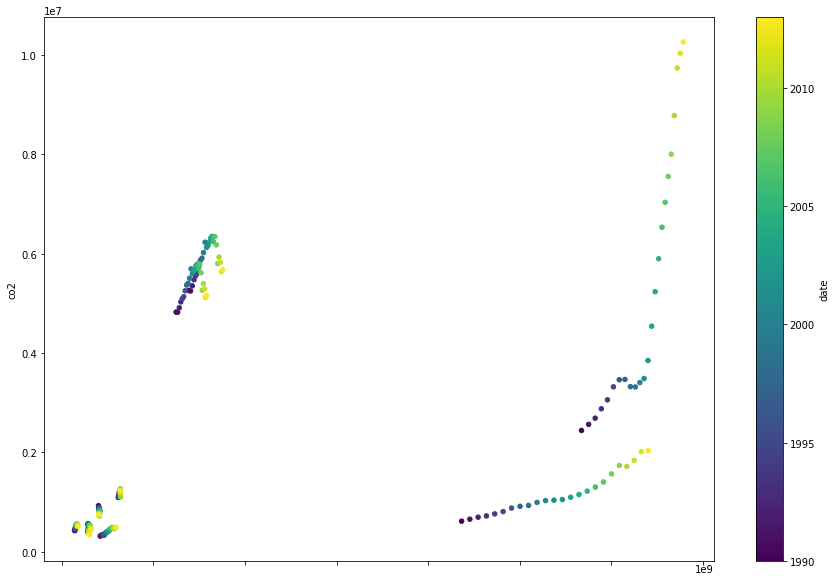

In [66]:
df_max_co2.set_index('Country').plot.scatter(
    x='population',
    y='co2',
    c='date',
    colormap = 'viridis',
    figsize=(15,10)
)

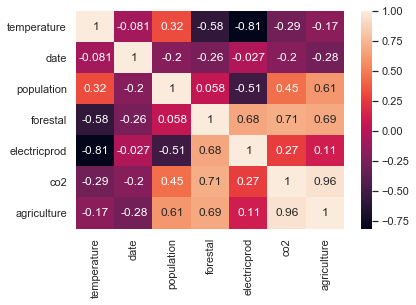

In [96]:
sns.heatmap(df_topten.reset_index().corr(),annot=True)

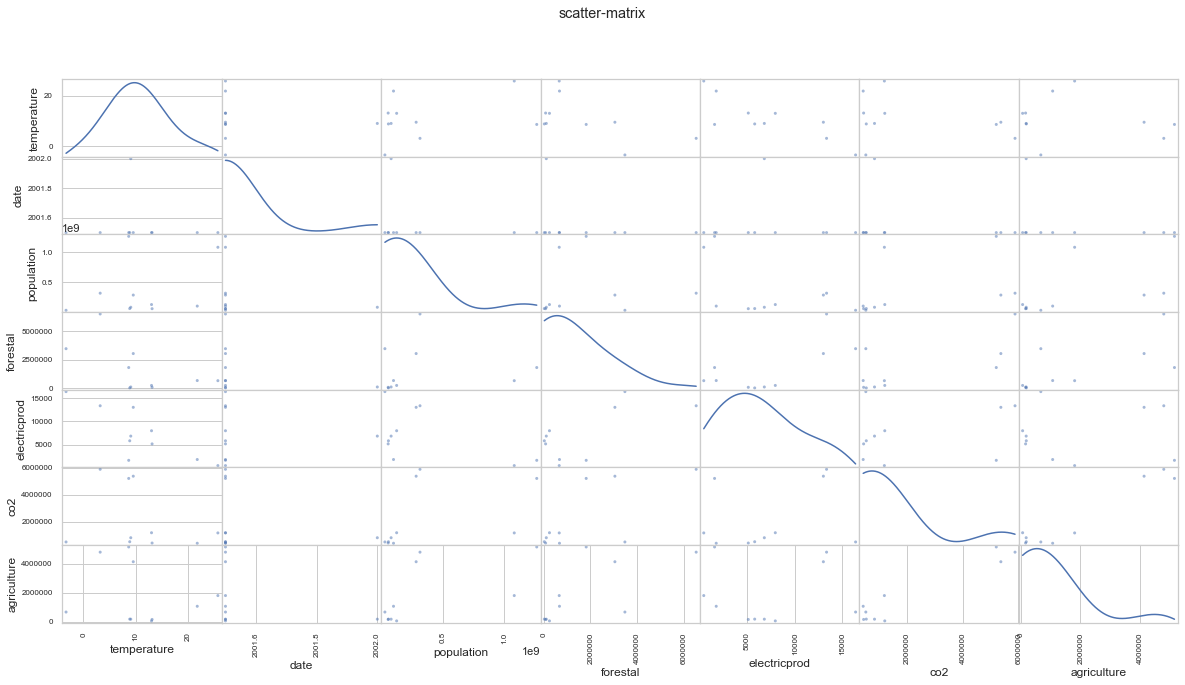

In [99]:
scatter_matrix(df_topten.reset_index(),diagonal='kde', figsize=(20,10)) 
plt.suptitle('scatter-matrix')

plt.show()

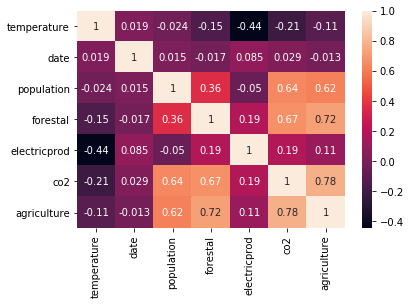

In [67]:
sns.heatmap(df_climate.corr(),annot = True)

In [68]:
df_med = df_climate.groupby('date').median()
df_med

,temperature,population,forestal,electricprod,co2,agriculture
date,,,,,,
1990,22.7,"10,213,863.0","54,005.0","1,114.7","31,363.9","90,195.0"
1991,22.4,"10,346,663.5","60,307.5","1,072.5","27,343.0","91,870.0"
1992,19.9,"9,188,305.5","45,621.0","1,451.8","26,420.7","89,700.0"
1993,20.6,"9,951,683.5","44,579.0","1,520.3","28,267.1","89,890.0"
1994,20.7,"9,991,525.0","42,572.0","1,576.8","29,640.4","89,150.0"
1995,20.1,"10,026,176.0","41,640.0","1,578.3","29,090.3","81,080.0"
1996,20.2,"10,063,945.0","41,270.0","1,687.1","30,670.8","79,870.0"
1997,20.4,"10,108,977.0","41,270.0","1,762.4","30,623.1","80,120.0"
1998,21.5,"10,069,000.0","40,834.0","1,807.3","31,675.5","80,550.0"


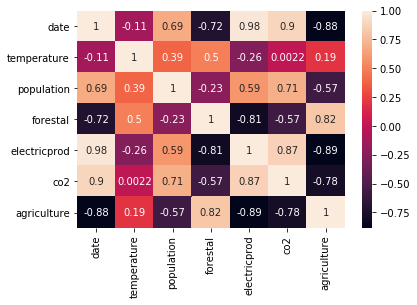

In [69]:
sns.heatmap(df_med.reset_index().corr(),annot=True)

In [70]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

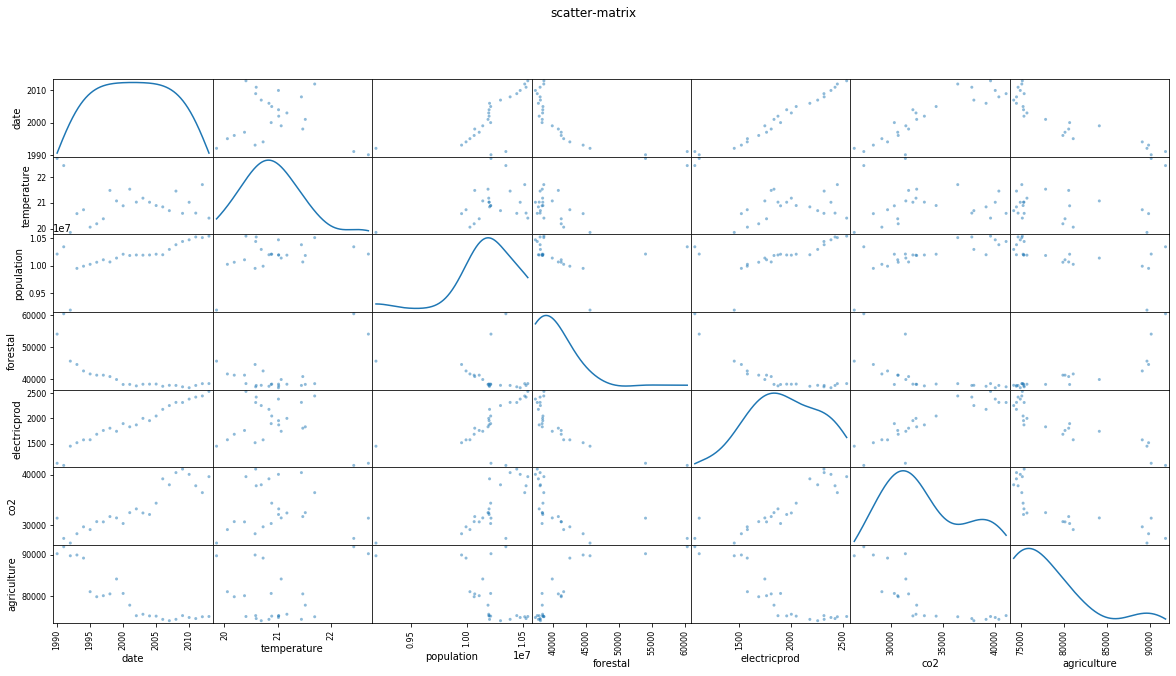

In [71]:
scatter_matrix(df_med.reset_index(),diagonal='kde', figsize=(20,10)) 
plt.suptitle('scatter-matrix')

plt.show()

In [72]:
from pandas.plotting import parallel_coordinates

In [73]:
df_samerica = df_climate[
df_climate['Country'].isin(['Colombia',
              'Argentina',
              'Bolivia',
              'Mexico',
              'Peru',
              'Chile'])
][['Country',
'temperature',
'co2',
'agriculture',
'forestal']]

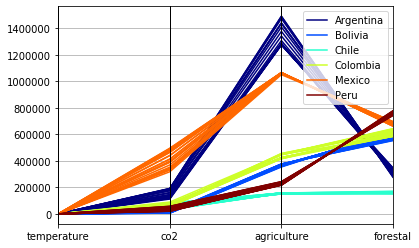

In [74]:
parallel_coordinates(df_samerica,'Country', colormap='jet')

In [77]:
df_climate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2735 entries, 62 to 7223
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       2735 non-null   object 
 1   temperature   2735 non-null   float64
 2   date          2735 non-null   int64  
 3   name          2735 non-null   object 
 4   population    2735 non-null   float64
 5   forestal      2735 non-null   float64
 6   electricprod  2735 non-null   float64
 7   co2           2735 non-null   float64
 8   agriculture   2735 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 213.7+ KB


In [84]:
df_climate.groupby(['Country']).median()

,temperature,date,population,forestal,electricprod,co2,agriculture
Country,,,,,,,
Albania,13.3,"2,001.5","3,055,591.5","7,773.4","1,383.0","3,912.7","11,330.0"
Algeria,24.4,"2,001.5","31,653,311.5","16,274.0",720.0,"93,669.8","399,633.5"
Angola,22.9,"2,001.5","17,232,585.0","595,408.0",84.3,"10,716.8","575,000.0"
Argentina,15.4,"2,001.5","37,478,700.5","313,578.0","2,104.7","140,976.0","1,286,580.0"
Armenia,10.2,"2,002.5","3,025,955.0","3,325.0","1,474.7","3,593.7","14,175.0"
...,...,...,...,...,...,...,...
Uruguay,18.0,"2,001.5","3,321,639.5","14,153.3","1,964.6","5,583.0","149,220.0"
Uzbekistan,13.9,"2,002.5","25,419,750.0","32,436.7","1,765.0","116,740.8","269,430.0"
Vietnam,24.9,"2,001.5","81,138,453.0","121,320.0",352.0,"65,973.0","94,690.0"


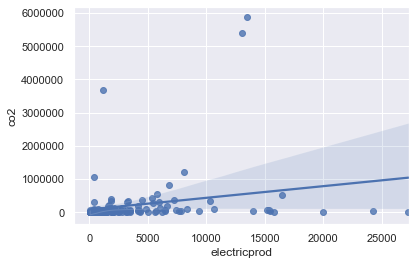

In [87]:
sns.set(color_codes=True)
sns.regplot(x="electricprod", y="co2", data=df_climate.groupby(['Country']).median());

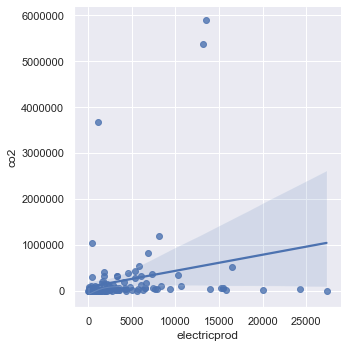

In [88]:
sns.lmplot(x="electricprod", y="co2", data=df_climate.groupby(['Country']).median());